GitHub [link](https://github.com/MYUSER/MYPROJECT/)!

Welcome to your assignment this week! 


# Classification task

In this task you are asked to build a simple Feed Forward Neural Network, train it and test it!


**After this assignment you will be able to:**

- Load a dataset.
- Train a Feed Forward Neural Network.
- Test a Feed Forward Neural Network.

Let's get started! Run the following cell to install all the packages you will need.

In [ ]:
#!pip install numpy
#!pip install keras
#!pip install tensorflow
#!pip install pandas
#!pip install matplotlib

Run the following cell to load the packages you will need.

In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
								confusion_matrix,
								accuracy_score,
								precision_score,
								recall_score,
								f1_score
							)
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import regularizers
from keras.models import load_model
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
import os
import tensorflow as tf

# Filtering tensorflow console log
tf.get_logger().setLevel('INFO')

#matplotlib inline

In [63]:
# Global Variables
BS = 16
EPOCH = 200
TEST_SPLIT = 0.2
MODEL_SAVE_FILE_PATH = os.path.join('.','binary_ann.hdf5')

The dataset we will use consists of 4500 examples with 512 features. A label is given for each example to indicate positive and negative instances.

Let's read the data.

In [64]:
df = pd.read_csv('data.csv', index_col='id')
# df.set_index('id', inplace=True)

print(df.head(10))

         v1       v2       v3       v4       v5       v6       v7       v8  \
id                                                                           
1   0.37797 -0.94808  0.01346  0.17893  0.37795  0.63571  0.13943 -0.25607   
2   0.07609 -0.09774  0.39666 -0.39026  0.10606  0.52774  0.07105  0.33720   
3   1.19391 -0.68707 -0.68422 -0.36378 -0.60847 -0.40118  1.45432  0.00592   
4   1.34949 -0.31498 -1.30248  0.50278  1.66292 -1.06094 -0.70835 -0.24237   
5  -0.03512 -0.34196  0.14230  1.50513 -0.14364  0.49429  0.07823 -0.04356   
6  -0.46177 -0.29613  0.61101 -1.00880  0.29751 -1.08969 -0.85424 -0.13436   
7  -0.47879 -0.89301 -1.21926  1.30133 -1.01324 -0.26255 -1.36692 -0.25257   
8  -0.27780  1.19527  0.13443  0.03244 -0.98221  0.04890 -0.40746 -1.52098   
9   0.15766 -0.25867 -1.04032 -0.27115 -0.73369 -0.48371 -0.56941 -0.32896   
10  0.57303  0.00301  0.74221 -0.12980  0.42092 -0.56008  1.21466  0.14197   

         v9      v10  ...     v504     v505     v506     v507  

Now, let's split the data into training and test sets.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=TEST_SPLIT,
    random_state=17,
    stratify=df.label.values
)
df['data_type'] = ['note_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'

## The data to use:

X_train = df[df['data_type']=='train'].iloc[:,:512].values
X_test = df[df['data_type']=='test'].iloc[:,:512].values
y_train = df[df['data_type']=='train'].iloc[:,512:513].values
y_test = df[df['data_type']=='test'].iloc[:,512:513].values

# Task 1

Build a Feed Forward Neural Network to address this classification task using the Keras framework.

In [66]:
# START YOUR CODE HERE
def get_nn_model(input_features_dim):
    """
    Params:
    input_features_dim : Number of features in training data
    """
    input_features_dim = X_train.shape[1]
    model = Sequential()
    model.add(Dense(32, input_dim=input_features_dim, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [67]:
model = get_nn_model(X_train.shape[1])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

# callbacks
# Early stopping when the model performance doesn't increase for 50 epochs
earlystopping = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=30)
# Change the learning rate by a factor when the performance doesn't increase for 15 epochs
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.01, min_lr=0.00001)
# save the best model based on validation accuracy 
model_check_point = ModelCheckpoint(MODEL_SAVE_FILE_PATH, monitor='val_acc', verbose=0, save_best_only=True, mode='max', period=1)


# Training

Now, let's start our training.

In [68]:
# history = model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1)
# Fit the model (training)
history = model.fit(
                    X_train, y_train,
                    batch_size=BS,
                    epochs=EPOCH,
                    verbose=1, 
                    validation_data=(X_test, y_test),
                    shuffle=True,
                    callbacks=[earlystopping, reduce_lr_on_plateau, model_check_point]
                    )


Train on 3600 samples, validate on 900 samples
Epoch 1/200
3600/3600 [==============================] - 3s 878us/step - loss: 0.9017 - acc: 0.6247 - val_loss: 0.7026 - val_acc: 0.8522
Epoch 2/200
3600/3600 [==============================] - 2s 474us/step - loss: 0.5182 - acc: 0.8875 - val_loss: 0.2909 - val_acc: 0.9744
Epoch 3/200
3600/3600 [==============================] - 2s 503us/step - loss: 0.2941 - acc: 0.9764 - val_loss: 0.2582 - val_acc: 0.9767
Epoch 4/200
3600/3600 [==============================] - 2s 455us/step - loss: 0.2358 - acc: 0.9861 - val_loss: 0.2191 - val_acc: 0.9833
Epoch 5/200
3600/3600 [==============================] - 2s 440us/step - loss: 0.2016 - acc: 0.9889 - val_loss: 0.1945 - val_acc: 0.9878
Epoch 6/200
3600/3600 [==============================] - 2s 465us/step - loss: 0.1656 - acc: 0.9944 - val_loss: 0.1752 - val_acc: 0.9867
Epoch 7/200
3600/3600 [==============================] - 2s 474us/step - loss: 0.1577 - acc: 0.9917 - val_loss: 0.1668 - val_acc: 0

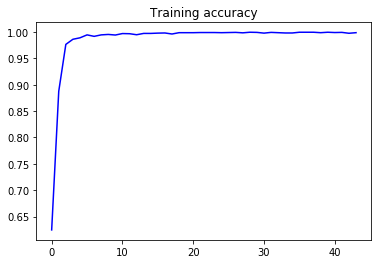

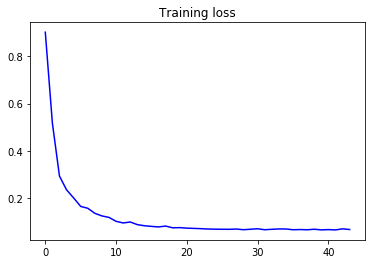

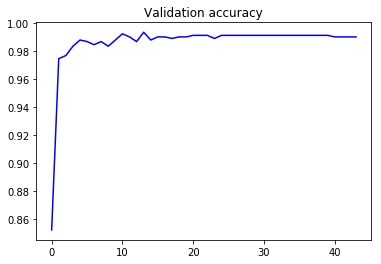

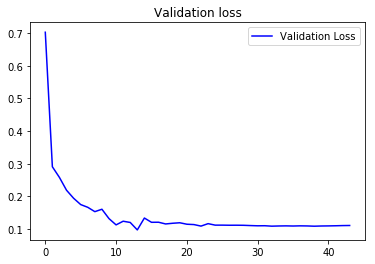

In [69]:
# Training summary
acc = history.history['acc']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')

# Validation summary
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.figure()
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Validation accuracy')
plt.figure()
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation loss')
plt.legend()
plt.show()

# Task 2

Test the model on the test set.

In [70]:
# START YOUR CODE HERE
def tf_load_saved_best_model():
	"""
	Output:
		Returns best performing model saved
	"""
	return load_model(MODEL_SAVE_FILE_PATH)

In [71]:
# Loading the best model saved by modelcheckpoint callback
model = tf_load_saved_best_model()

In [72]:
# test prediction
y_pred = model.predict(X_test)
# converting the each probability score to class using a threshold of 0.5 for the test set
for item in y_pred:
    if item[0]>0.5:
        item[0] = 1
    else:
        item[0] = 0

In [73]:
# model evaluation

print('Confusion Matrix:\n', confusion_matrix(y_test,pred_y))
print('Accuracy', accuracy_score(y_test,pred_y))
print('Precision:', precision_score(y_test,pred_y))
print('Recall', recall_score(y_test,pred_y))
print('F1 score', f1_score(y_test,pred_y))

Confusion Matrix:
 [[317  12]
 [  0 571]]
Accuracy 0.9866666666666667
Precision: 0.9794168096054888
Recall 1.0
F1 score 0.9896013864818024


# Congratulations!

You've come to the end of this assignment, and you have built your first neural network. 

Congratulations on finishing this notebook! 

